In [16]:
# Gain modulation RNN with oja learning on weight matrix
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from abb05_wt import SimpleNeuralNetwork

In [17]:
# load the pickle file
with open('abb05_rep.pkl', 'rb') as f:
    model = pickle.load(f)
    losses = pickle.load(f)
    weight_sums = pickle.load(f)
    gain_changes = pickle.load(f)
    shift_changes = pickle.load(f)
    weights = pickle.load(f)
epochs = len(losses)

In [18]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5

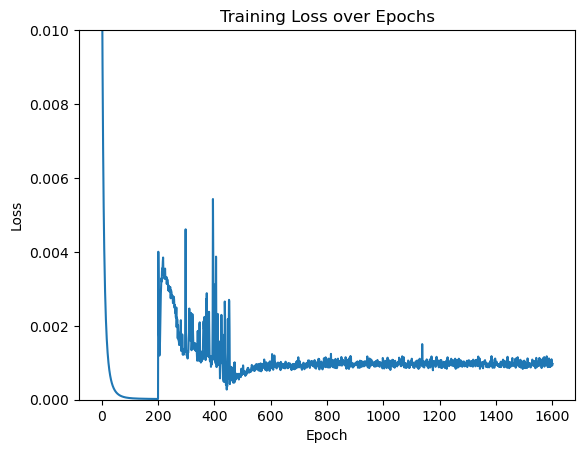

In [19]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.01])
plt.title('Training Loss over Epochs')
plt.savefig('abb05_loss.png')
plt.show()

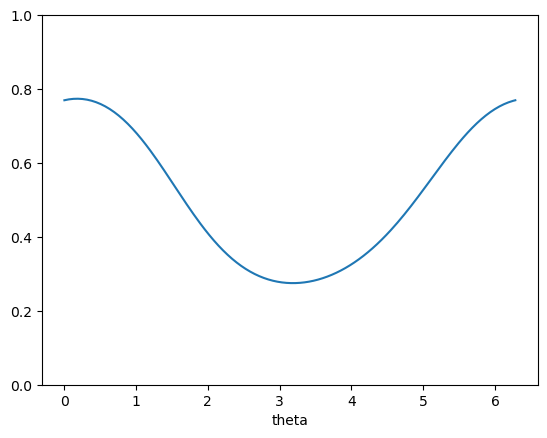

In [20]:
# Plotting the outputs
model.eval()
outputs = []
for x in xs:
    output = model(x)
    outputs.append(output.item())
plt.plot(xs, outputs)
plt.ylim([0,1])
plt.xlabel("theta")
# plt.savefig('abb05_outputs.png')
plt.show()

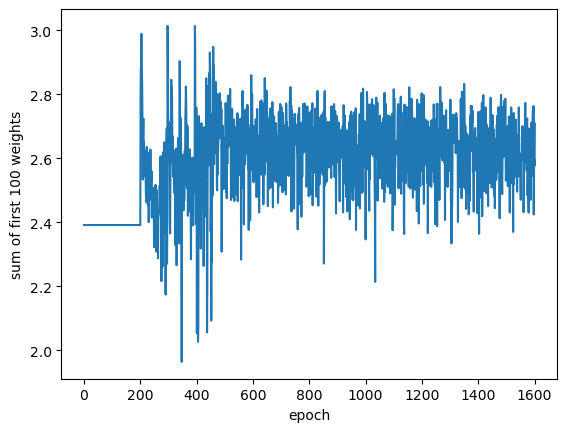

In [21]:
plt.plot(np.arange(epochs), weight_sums)
# plt.ylim([0,8])
plt.xlabel("epoch")
plt.ylabel("sum of first 100 weights")
# plt.savefig('abb05_ws.png')
plt.show()

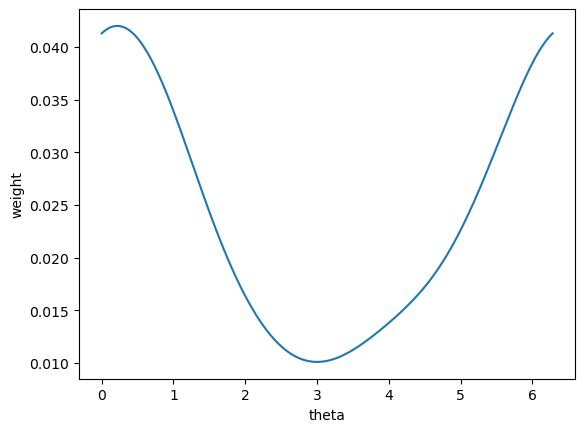

In [22]:
final_weight = weights[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_size), final_weight.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("weight")
# plt.savefig('abb05_ws.png')
plt.show()

In [23]:
rates = []
for x in xs:
    input = model.gaussian_rf(x)
    rate = model.activation_func(model.gain * (input - model.shift))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
rates

array([[0.5001, 0.4997, 0.4986, ..., 0.4986, 0.4997, 0.5001],
       [0.4998, 0.5001, 0.4996, ..., 0.497 , 0.4988, 0.4998],
       [0.4989, 0.4999, 0.5001, ..., 0.4949, 0.4973, 0.4989],
       ...,
       [0.4989, 0.4973, 0.4949, ..., 0.5001, 0.4999, 0.4989],
       [0.4998, 0.4988, 0.497 , ..., 0.4996, 0.5001, 0.4998],
       [0.5001, 0.4997, 0.4986, ..., 0.4986, 0.4997, 0.5001]],
      dtype=float32)

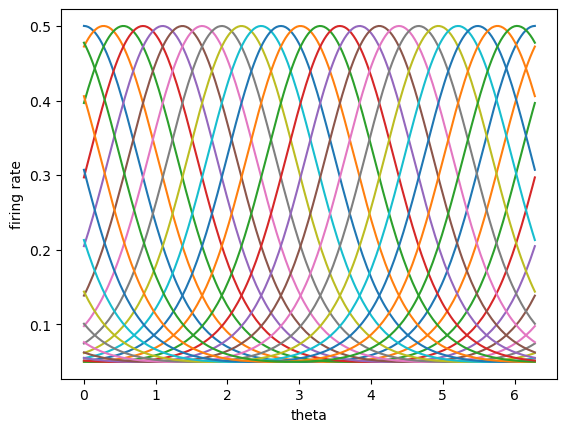

In [24]:
for i in np.arange(0,model.input_size,10):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.xlabel("theta")
plt.ylabel("firing rate")
plt.savefig('abb05_rf.png')

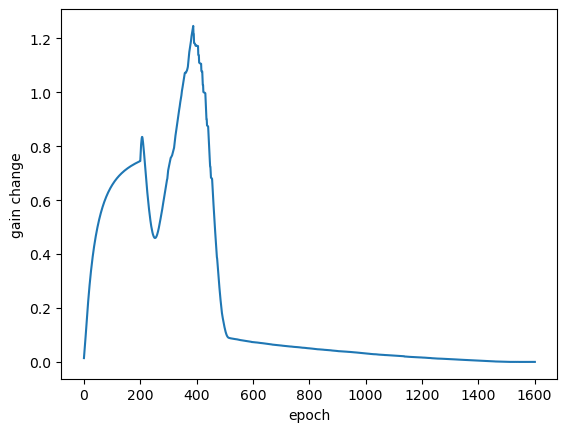

In [25]:
plt.plot(np.arange(epochs), gain_changes)
plt.xlabel("epoch")
plt.ylabel("gain change")
# plt.hlines(y=np.sqrt(460)*0.1, xmin=0, xmax=epochs)
plt.savefig('abb05_gc.png')
plt.show()

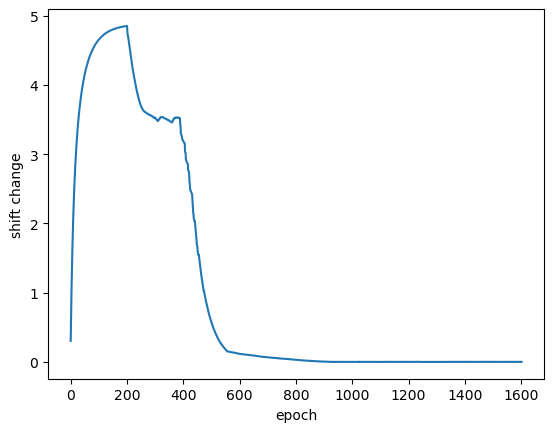

In [26]:
plt.plot(np.arange(epochs), shift_changes)
plt.xlabel("epoch")
plt.ylabel("shift change")
# plt.hlines(y=np.sqrt(460)*0.1, xmin=0, xmax=epochs)
plt.savefig('abb05_sc.png')
plt.show()

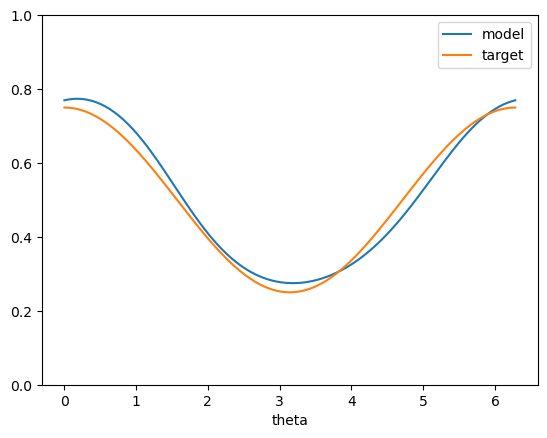

In [28]:
# Plotting the outputs
model.gain = model.init_gain
model.shift = model.init_shift
model.eval()
outputs = []
for x in xs:
    output = model(x)
    outputs.append(output.item())
plt.plot(xs, outputs, label='model')
plt.plot(xs, ys, label='target')
plt.ylim([0,1])
plt.xlabel("theta")
plt.legend()
plt.savefig('abb05_outputs_nosup.png')